In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import math
from utils.preprocessstock import preprocess
from sklearn.metrics import mean_squared_error  as MSE
from sklearn.metrics import explained_variance_score
from utils.predictor import Predictor

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [6]:
def evaluate(model, test_features, test_labels, getmax, getmin):
    predictions = model.predict(test_features)
    predictions
    predictions = predictions.reshape(1,-1)[0]
    for i in range(0, len(predictions)):
        predictions[i] = (predictions[i]*(getmax-getmin))+getmin
    test_labels = test_labels.reshape(1,-1)[0]
    for i in range(0, len(test_labels)):
        test_labels[i] = (test_labels[i]*(getmax-getmin))+getmin    
    RMSE = math.sqrt(MSE(test_labels, predictions))
    EVS = explained_variance_score(test_labels, predictions)
    
    return RMSE, EVS


In [7]:
tickers=['AAPL','AMZN','FB','GOOG','MMM','MSFT','NFLX','NKE','NVDA','INTC','CSCO','WMT','TSLA','EBAY',
         'ORCL','CBG.BK','OSP.BK','BBL.BK','SCB.BK','LH.BK','MINT.BK','PTT.BK','BANPU.BK','ADVANC.BK',
         'TRUE.BK','AOT.BK','BEM.BK','BTS.BK','CPALL.BK','CPN.BK']
df = pd.DataFrame(columns=list(['Stock', 'RMSE', 'EVS']))
for stock in tickers:
    model = Predictor('tdnn', 32)
    features, labels, getmax, getmin = model.load_transform(stock)
    train_test_split_factor = .80
    test_x, test_y = features[math.floor(len(features)*train_test_split_factor):], labels[math.floor(len(labels)*train_test_split_factor):]
    
    rmse, evs = evaluate(model, test_x, test_y, getmax, getmin)
    df2 = pd.DataFrame({"Stock":[stock], "RMSE":[rmse] ,"EVS":[evs]})
    df = df.append(df2)

In [8]:
pd.options.display.float_format = '{:.6f}'.format
df

,Stock,RMSE,EVS
0,AAPL,6.641496,0.937189
0,AMZN,153.492321,0.903012
0,FB,13.311678,0.892199
0,GOOG,60.333633,0.912200
0,MMM,7.398244,0.663489
0,MSFT,9.353957,0.823644
0,NFLX,26.864227,0.769071
0,NKE,5.451743,0.921108
0,NVDA,23.057302,0.958681
0,INTC,3.086997,0.690613


In [30]:
df.to_csv("evaluate.csv")

In [28]:
model = Predictor('tdnn', 32)
stock = 'AAPL'
x, y, getmax, getmin = model.load_transform(stock)
pred = model.predict(x)

In [29]:
y = y.reshape(1,-1)[0]
for i in range(0, len(y)):
    y[i] = (y[i]*(getmax-getmin))+getmin

In [30]:
pred = pred.reshape(1,-1)[0]
for i in range(0, len(pred)):
    pred[i] = (pred[i]*(getmax-getmin))+getmin

In [31]:
y = y[-28:]
pred = pred[-7:]
all = np.append(y, pred)

In [34]:
y

array([118.830284, 118.88013 , 119.91682 , 119.00971 , 117.654045,
       118.26211 , 116.96624 , 113.48736 , 114.803154, 115.660416,
       116.21863 , 118.6708  , 122.32911 , 122.68796 , 122.54841 ,
       121.86061 , 123.35583 , 123.98382 , 121.3921  , 122.84745 ,
       122.020096, 121.3921  , 127.472664, 127.40289 , 128.29005 ,
       126.25656 , 127.82155 , 131.45993 ], dtype=float32)

In [33]:
all2 = np.diff(all) / all[1:] * 100
all2

array([ 0.04192697,  0.86450744, -0.7622105 , -1.1522486 ,  0.5141653 ,
       -1.1078991 , -3.0654356 ,  1.1461322 ,  0.74118847,  0.48031226,
        2.0663645 ,  2.9905474 ,  0.29248884, -0.11387277, -0.5644133 ,
        1.2121165 ,  0.5065102 , -2.1349995 ,  1.184683  , -0.67804766,
       -0.5173305 ,  4.7700944 , -0.05476392,  0.69152766, -1.6106039 ,
        1.2243532 ,  2.7676737 , -5.4643116 , -0.32618064, -0.7798213 ,
        0.46822742, -0.37694108, -0.35083964,  1.4670268 ], dtype=float32)

In [9]:
pred[-7:]

array([124.648735, 124.24348 , 123.2821  , 123.86205 , 123.39692 ,
       122.96551 , 124.7963  ], dtype=float32)

In [28]:
from datetime import date, timedelta
c_days = 28
a = date.today()
dateList  = []
for i in range (c_days, 0, -1):
    d = a - timedelta(days = i)
    d = d.strftime("%d%b")
    dateList.append(d)
dateList_f = []
for i in range (0, 7):
    d = a + timedelta(days = i)
    d = d.strftime("%d%b")
    dateList_f.append(d)
dateList.append(dateList_f[0])

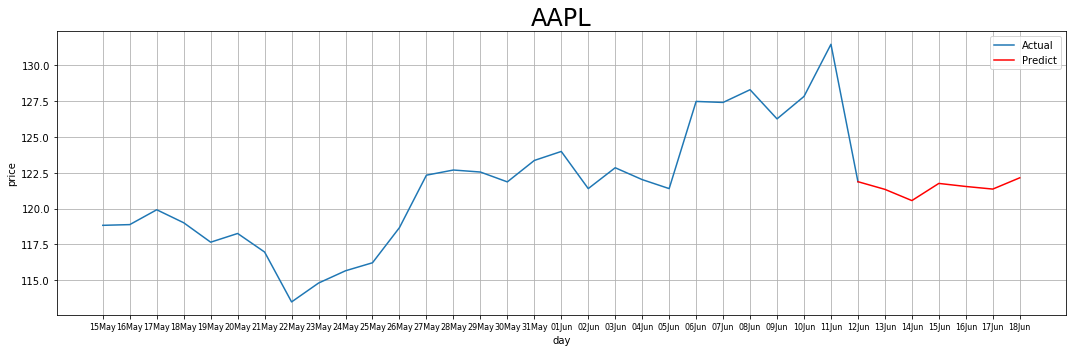

In [29]:
y = y.reshape(1,-1)[0]
y = y[-28:]
pred = pred.reshape(1,-1)[0]
yy = pred[-7:]
yyy = yy[0]
y = np.append(y,yyy)
plt.figure(figsize=(15,5))
plt.title(stock, fontsize=24)
plt.plot(dateList, y, label ='Actual')
plt.plot(dateList_f, yy, color='red', label ='Predict')
plt.xlabel('day')
plt.xticks(fontsize=8)
plt.ylabel('price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()